In [1]:
import pandas as pd
data=pd.read_csv('churndata.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,0
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


In [2]:
# Display distribution of 'churned' column
data['churned'].value_counts()

churned
0    4139
1    1495
Name: count, dtype: int64

In [3]:
# Handle class imbalance by upsampling the minority class
from sklearn.utils import resample
import pandas as pd

df_majority = data[data.churned == 0]
df_minority = data[data.churned == 1]

# Upsample minority class
df_minority_upsampled = resample(
    df_minority,
    replace=True,               
    n_samples=len(df_majority),# Match number of majority class
    random_state=42
)

# Combine majority and upsampled minority
data = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [4]:
# Display distribution of 'churned' column
data['churned'].value_counts()

churned
0    4139
1    4139
Name: count, dtype: int64

In [5]:
# drop customer ID column
data = data.drop(columns=['customerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            8278 non-null   object 
 1   SeniorCitizen     8278 non-null   int64  
 2   Partner           8278 non-null   object 
 3   Dependents        8278 non-null   object 
 4   tenure            8278 non-null   int64  
 5   PhoneService      8278 non-null   object 
 6   MultipleLines     8278 non-null   object 
 7   InternetService   8278 non-null   object 
 8   OnlineSecurity    8278 non-null   object 
 9   OnlineBackup      8278 non-null   object 
 10  DeviceProtection  8278 non-null   object 
 11  TechSupport       8278 non-null   object 
 12  StreamingTV       8278 non-null   object 
 13  StreamingMovies   8278 non-null   object 
 14  Contract          8278 non-null   object 
 15  PaperlessBilling  8278 non-null   object 
 16  PaymentMethod     8278 non-null   object 


In [6]:
# normalize the numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['tenure']] = scaler.fit_transform(data[['tenure']])
data[['MonthlyCharges']] = scaler.fit_transform(data[['MonthlyCharges']])

# Convert 'TotalCharges' to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Fill NaN values in 'TotalCharges' with the mean
data.fillna({'TotalCharges': data['TotalCharges'].mean()}, inplace=True)
# Now scale
data[['TotalCharges']] = scaler.fit_transform(data[['TotalCharges']])

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churned
0,Female,0,No,No,0.750000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),0.760837,0.588845,0
1,Male,0,No,No,0.097222,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.755855,0.075024,1
2,Female,0,Yes,Yes,0.250000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0.018435,0.044208,0
3,Female,0,Yes,Yes,0.250000,Yes,No,DSL,No,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),0.358744,0.108269,0
4,Male,0,Yes,No,0.083333,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,0.723468,0.059099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,Male,0,No,No,0.388889,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.869955,0.341642,1
8274,Female,0,No,No,0.013889,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,0.519183,0.005960,1
8275,Male,0,No,No,0.222222,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0.012955,0.037336,1
8276,Female,0,No,No,0.013889,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0.268560,0.003058,0


In [ ]:
# Feature engineering
data['AvgMonthlySpend'] = data['TotalCharges'] / (data['tenure'] + 1)
data['AvgChargesPerMonth'] = data['TotalCharges'] / data['tenure'].replace(0, 1)
data.drop(['tenure', 'TotalCharges'], axis=1, inplace=True)

In [8]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype(str)
le=LabelEncoder()
data_encoded = data.copy()
for col in categorical_columns:
	data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,churned,AvgMonthlySpend,AvgChargesPerMonth
0,0,0,0,0,1,2,1,0,2,2,0,2,0,1,1,0,0.760837,0,0.336483,0.785126
1,1,0,0,0,1,0,1,0,2,0,0,2,2,0,1,2,0.755855,1,0.068376,0.771670
2,0,0,1,1,1,0,2,1,1,1,1,1,1,0,1,3,0.018435,0,0.035366,0.176830
3,0,0,1,1,1,0,0,0,0,2,2,0,0,1,1,1,0.358744,0,0.086615,0.433074
4,1,0,1,0,1,0,1,0,2,2,0,0,2,0,1,2,0.723468,1,0.054553,0.709189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,1,0,0,0,1,2,1,0,2,2,0,2,2,0,1,2,0.869955,1,0.245982,0.878507
8274,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0.519183,1,0.005878,0.429128
8275,1,0,0,0,1,0,2,1,1,1,1,1,1,0,1,3,0.012955,1,0.030547,0.168011
8276,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0.268560,0,0.003016,0.220172


In [9]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              8278 non-null   int64  
 1   SeniorCitizen       8278 non-null   int64  
 2   Partner             8278 non-null   int64  
 3   Dependents          8278 non-null   int64  
 4   PhoneService        8278 non-null   int64  
 5   MultipleLines       8278 non-null   int64  
 6   InternetService     8278 non-null   int64  
 7   OnlineSecurity      8278 non-null   int64  
 8   OnlineBackup        8278 non-null   int64  
 9   DeviceProtection    8278 non-null   int64  
 10  TechSupport         8278 non-null   int64  
 11  StreamingTV         8278 non-null   int64  
 12  StreamingMovies     8278 non-null   int64  
 13  Contract            8278 non-null   int64  
 14  PaperlessBilling    8278 non-null   int64  
 15  PaymentMethod       8278 non-null   int64  
 16  Monthl

In [10]:
import numpy as np

# Outlier detection using IQR for numeric columns
numeric_cols = ['AvgMonthlySpend', 'MonthlyCharges', 'AvgChargesPerMonth']
for col in numeric_cols:
    # Convert to numeric if not already
    data[col] = pd.to_numeric(data[col], errors='coerce')
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound))
    print(f"{col}: {outliers.sum()} outliers detected")

AvgMonthlySpend: 0 outliers detected
MonthlyCharges: 0 outliers detected
AvgChargesPerMonth: 0 outliers detected


In [11]:
# Selecting relevant features for the model
selected_features = [
    'Contract', 'AvgMonthlySpend', 'MonthlyCharges', 
    'AvgChargesPerMonth', 'InternetService',
    'PaymentMethod', 'OnlineSecurity'
]
# selecting the features for the model
data_encoded = data_encoded[selected_features + ['churned']]
# splitting the dataset into features and target variable
X = data_encoded.drop('churned', axis=1)
Y = data_encoded['churned']
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# creating the model
model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split=2, n_estimators= 100, class_weight='balanced', random_state=42)
# training the model
model.fit(X_train, Y_train)
# making predictions
predictions = model.predict(X_test)
# evaluating the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
# saving the model
import joblib
joblib.dump(model, 'churn_model.pkl')

[[674 196]
 [109 677]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.82       870
           1       0.78      0.86      0.82       786

    accuracy                           0.82      1656
   macro avg       0.82      0.82      0.82      1656
weighted avg       0.82      0.82      0.82      1656



['churn_model.pkl']

AUC: 0.8970533181246526


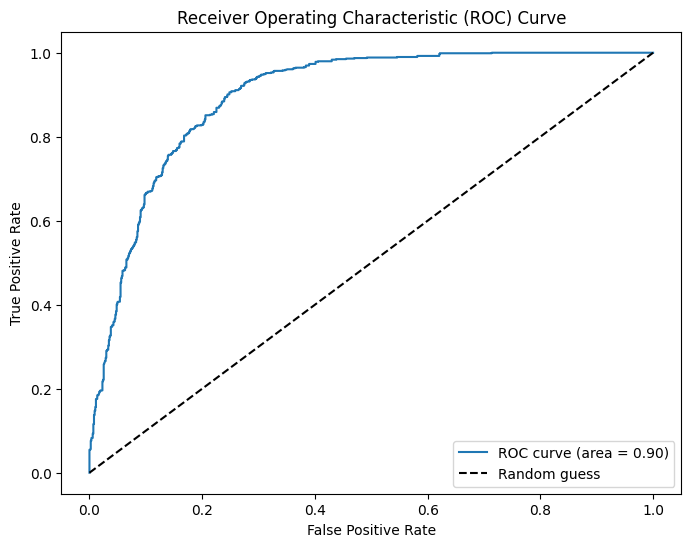

In [12]:
# AUC and ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# calculating the probabilities
probs = model.predict_proba(X_test)[:, 1]
# calculating the AUC
auc = roc_auc_score(Y_test, probs)
print(f"AUC: {auc}")
# calculating the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
import matplotlib.pyplot as plt
# plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9393018988589543
[[714 156]
 [ 36 750]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       870
           1       0.83      0.95      0.89       786

    accuracy                           0.88      1656
   macro avg       0.89      0.89      0.88      1656
weighted avg       0.89      0.88      0.88      1656



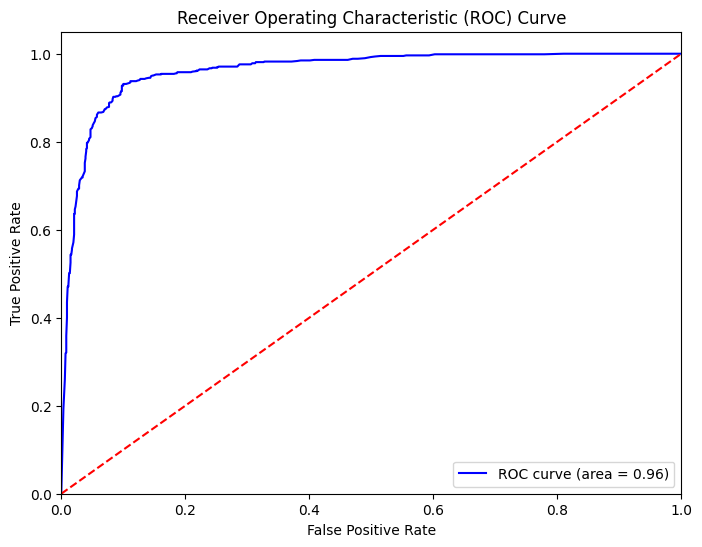

In [13]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}   
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, verbose=2, n_jobs=-1)
# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)
# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_churn_model.pkl')
# Load the model and make predictions
loaded_model = joblib.load('best_churn_model.pkl')
# Make predictions with the loaded model
loaded_predictions = loaded_model.predict(X_test)
# Evaluate the loaded model
print(confusion_matrix(Y_test, loaded_predictions))
print(classification_report(Y_test, loaded_predictions))
# Roc curve and AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, loaded_model.predict_proba(X_test)[:, 1])
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print("Train Accuracy:", accuracy_score(Y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))


Train Accuracy: 0.9957716701902748
Test Accuracy: 0.8840579710144928


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print("CV Accuracy: ", scores.mean())


CV Accuracy:  0.8106279427691957


In [16]:
# finfing the feature importances
importances = model.feature_importances_
# creating a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# sorting the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) 
# displaying the feature importances
print(feature_importances)

              Feature  Importance
0            Contract    0.254565
1     AvgMonthlySpend    0.195611
2      MonthlyCharges    0.162005
3  AvgChargesPerMonth    0.152266
6      OnlineSecurity    0.100199
4     InternetService    0.082782
5       PaymentMethod    0.052572


In [17]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, Y_test)
result_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
# sorting the DataFrame by importance
result_df = result_df.sort_values(by='Importance', ascending=False)
# displaying the permutation importances
print(result_df)

              Feature  Importance
0            Contract    0.121618
1     AvgMonthlySpend    0.068478
2      MonthlyCharges    0.050483
4     InternetService    0.037560
3  AvgChargesPerMonth    0.032729
5       PaymentMethod    0.024517
6      OnlineSecurity    0.014493


[[698 172]
 [ 64 722]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       870
           1       0.81      0.92      0.86       786

    accuracy                           0.86      1656
   macro avg       0.86      0.86      0.86      1656
weighted avg       0.86      0.86      0.86      1656

XGBoost AUC: 0.9190320552192097


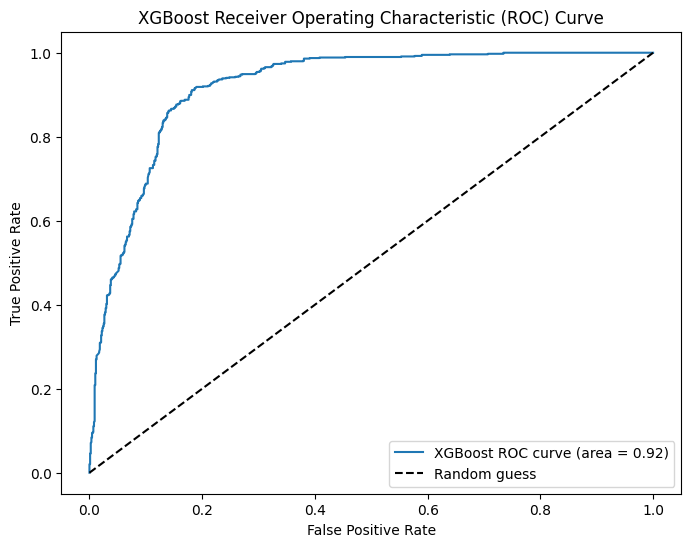

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# XGBoost implementation for churn prediction


# Create and train the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(Y_test, xgb_predictions))
print(classification_report(Y_test, xgb_predictions))

# ROC AUC
xgb_auc = roc_auc_score(Y_test, xgb_probs)
print(f"XGBoost AUC: {xgb_auc}")

# ROC Curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(Y_test, xgb_probs)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost ROC curve (area = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:55:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[671 199]
 [ 55 731]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       870
           1       0.79      0.93      0.85       786

    accuracy                           0.85      1656
   macro avg       0.86      0.85      0.85      1656
weighted avg       0.86      0.85      0.85      1656

XGBoost (GridSearchCV) AUC: 0.9188770436664618


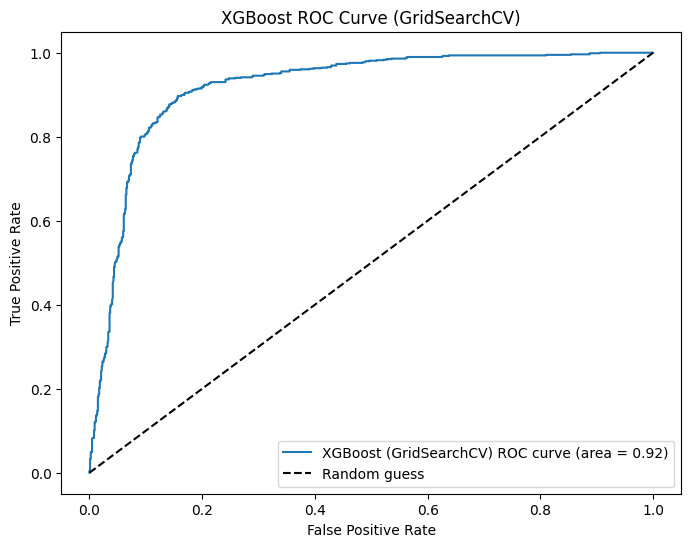

In [19]:
# Use the best parameters from grid_search to train an XGBoost model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [1000,100, 200],             # 2 options (enough to test depth + learning rate)
    'max_depth': [3, 6,5],                    # Simple vs moderate complexity trees
    'learning_rate': [0.05, 0.1],           # Stable + reasonably fast convergence
    'subsample': [0.8],                     # Safe middle ground (prevents overfitting)
    'colsample_bytree': [0.8],
    'reg_alpha': [0, 0.1, 1,0.005],                   # L1 regularization (sparse features)
    'reg_lambda': [0.5, 1, 2],                  # Also reduces overfitting
    'scale_pos_weight': [1, 2],             # To help with class imbalance
}
grid_search = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1,
    refit=True  # Refit the model with the best parameters
)
grid_search.fit(X_train, Y_train)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Get the best parameters and train the model
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
best_params = grid_search.best_params_

xgb_best = XGBClassifier(
    objective='binary:logistic',
    gamma=0.1,
    n_estimators=best_params.get('n_estimators', 100),
    max_depth=best_params.get('max_depth', 6),
    learning_rate=best_params.get('learning_rate', 0.1),
    subsample=best_params.get('subsample', 0.8),
    colsample_bytree=best_params.get('colsample_bytree', 0.8),
    reg_alpha=best_params.get('reg_alpha', 0),
    reg_lambda=best_params.get('reg_lambda', 1),
    scale_pos_weight=best_params.get('scale_pos_weight', 1),
    eval_metric='logloss',
    random_state=42
)
xgb_best.fit(X_train_sub, y_train_sub, eval_set=[(X_val, y_val)], verbose=False)
# Make predictions and evaluate the model
xgb_best_predictions = xgb_best.predict(X_test)
xgb_best_probs = xgb_best.predict_proba(X_test)[:, 1]

print(confusion_matrix(Y_test, xgb_best_predictions))
print(classification_report(Y_test, xgb_best_predictions))

xgb_best_auc = roc_auc_score(Y_test, xgb_best_probs)
print(f"XGBoost (GridSearchCV) AUC: {xgb_best_auc}")

xgb_best_fpr, xgb_best_tpr, xgb_best_thresholds = roc_curve(Y_test, xgb_best_probs)

plt.figure(figsize=(8, 6))
plt.plot(xgb_best_fpr, xgb_best_tpr, label='XGBoost (GridSearchCV) ROC curve (area = {:.2f})'.format(xgb_best_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve (GridSearchCV)')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_best, X_train, Y_train, cv=5, scoring='accuracy')
print("CV Accuracy: ", scores.mean())


CV Accuracy:  0.8615183263979935


In [21]:
from sklearn.metrics import accuracy_score

y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

print("Train Accuracy:", accuracy_score(Y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))


Train Accuracy: 0.9475989127151918
Test Accuracy: 0.8466183574879227


In [22]:
# save the best XGBoost model
import joblib
joblib.dump(xgb_best, 'best_xgb_churn_model.pkl')


['best_xgb_churn_model.pkl']

In [23]:
# feature importances for XGBoost model
importances_xgb = xgb_best.feature_importances_
# creating a DataFrame for feature importances
feature_importances_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb})
# sorting the DataFrame by importance
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)
# Permutation importances for XGBoost model
from sklearn.inspection import permutation_importance
result_xgb = permutation_importance(xgb_best, X_test, Y_test)
result_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': result_xgb.importances_mean})
# sorting the DataFrame by importance
result_df_xgb = result_df_xgb.sort_values(by='Importance', ascending=False)
# displaying the permutation importances
print(result_df_xgb)


              Feature  Importance
1     AvgMonthlySpend    0.153986
0            Contract    0.092029
2      MonthlyCharges    0.086836
3  AvgChargesPerMonth    0.073671
5       PaymentMethod    0.030797
4     InternetService    0.013527
6      OnlineSecurity    0.005072
